## Final Project Submission

Please fill out:
* Student name: Joe Sanchez
* Student pace: self paced 
* Scheduled project review date/time: February 18th, 2021 1:30pm PST
* Instructor name: Jeff Herman
* Blog post URL:


# Welcome! (Notebook 1 of 2) 
# Introduction:

Hello! My name is Joe Sanchez and welcome to my jupyter notebook. 
The following code reflects my work on a project that requires me to clean, explore, and model the King County Housing Dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible.

Before going forward with this jupyter notebook, please keep in mind that this is notebook 1 out of 2 total.
In this notebook, I have gone through a preprocessing stage, before testing my final models, to look at and analyze the King County Data and what it intels. 

The first step I will be taking, will be to clean the data of null or missing values, as well as checking for heavy outliers so that the data follows a normal distribution curve as much as  possible. After the data has been cleaned to my liking, I will run a Ordinary Least Squares (OLS) Model on the cleaned data set, to keep an eye on any small or major changes throughout the preprocessing stage of this project.

All of the libraries used for this notebook will be imported in the next cell block.

# Preprocessing

In [1]:
# Here are all the libraries used for this notebook!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
from scipy import stats

from statsmodels.formula.api import ols
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

/Users/Joe/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Preprocessing: Cleaning the Initial Dataset


In [2]:
# Load in the kc_house_data.csv dataset
df = pd.read_csv('kc_house_data.csv')

In [3]:
# Run .info() and .head() to review data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Here I notice right away the the 'sqft_basement' column has an object dtype. After looking at the df.head(), the 'sqft_basement' column is clearly a numeric value. So lets change that.

In [5]:
# use pd.to_numeric to convert basement column to numeric value and errors='coerce' to view any invalid parsing errors
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

In [6]:
# View changes for sqft_basement
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

A couple things to note here, our dtypes look good, however, I will be switching out the dtypes to float to ensure more accurate readings when it comes to modeling. Next there are some null values in a few columns. We can see that there are 4 columns with missing values. Let's deal with them first.

In [7]:
# Fill Null Values
# Deciding on what exactly to fill the null values with was a little tricky.
# I didn't exactly want to fill missing values with an average or median value in concern that my model
# will make predictions on values that aren't necessarily true.
# For example I dont want to fill a missing value for a waterfront, incase the waterfront value turns out to be high
# and therefor altering my model results on possibly false information.
# I will be playing it safe for the model and dealing with values that I already have and know for certain they arent made up.
# All missing values will be set to 0.

# Waterfront = 2,376 missing values
df['waterfront'] = df['waterfront'].fillna(0)

# yr_renovated = 3,842 missing values
df['yr_renovated'] = df['yr_renovated'].fillna(0)

# view = 63 missing values
df['view'] = df['view'].fillna(0)

# sqft_basement = 454 missing values
df['sqft_basement'] = df['sqft_basement'].fillna(0)

In [8]:
# Now any column with a dtype of 'int' will be changed to 'float'

df['bedrooms'] = df['bedrooms'].astype(float)
df['sqft_living'] = df['sqft_living'].astype(float)
df['sqft_lot'] = df['sqft_lot'].astype(float)
df['condition'] = df['condition'].astype(float)
df['grade'] = df['grade'].astype(float)
df['sqft_above'] = df['sqft_above'].astype(float)
df['yr_built'] = df['yr_built'].astype(float)
df['sqft_living15'] = df['sqft_living15'].astype(float)
df['sqft_lot15'] = df['sqft_lot15'].astype(float)
df['zipcode'] = df['zipcode'].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  float64
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  float64
 6   sqft_lot       21597 non-null  float64
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  float64
 11  grade          21597 non-null  float64
 12  sqft_above     21597 non-null  float64
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  float64
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  float64
 17  lat            21597 non-null  float64
 18  long  

Perfect! Every numeric column has no missing values and are now converted to float64, with the exception of the 'id' columnd because I know 'id' will not be used for my model.

Moving forward I decided I am not going to work with the Date column. Reasons being after looking at the value counts, do not notice any significant amount of variety to work with. So I'm going to drop the column all together.

In [10]:
df = df.drop(['date'], axis =1)

Now that our data has been cleaned up a bit, I am now going to check for normal and non-normal distributions amongst each column to determine what needs to be done to bring our data to a more noraml distrubtion structure.

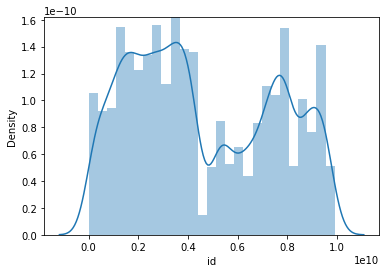

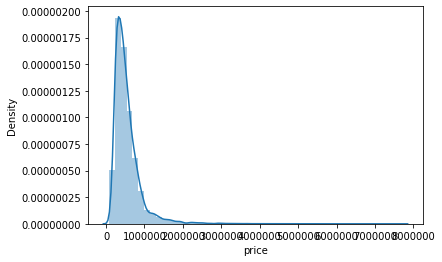

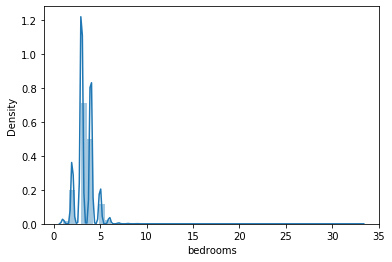

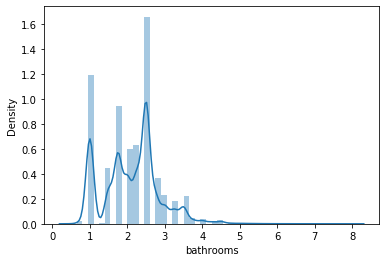

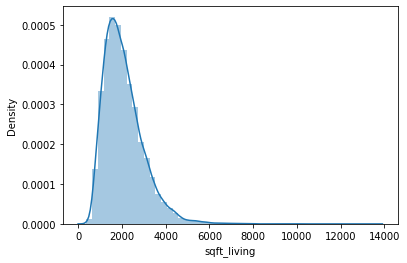

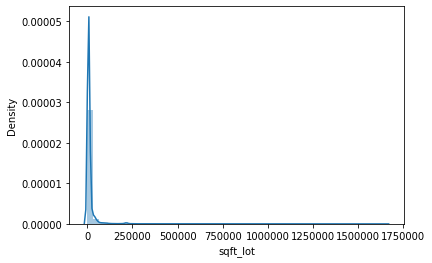

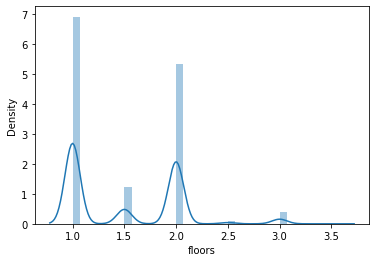

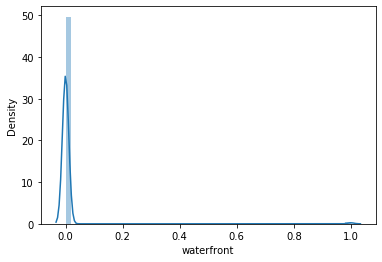

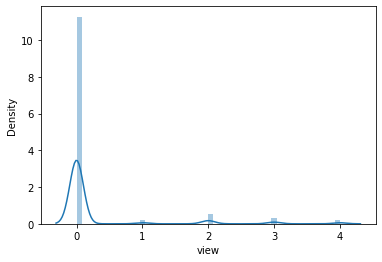

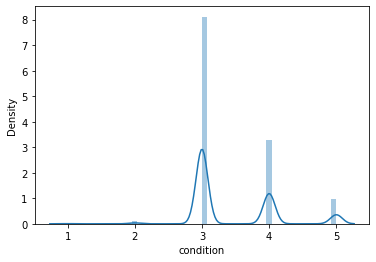

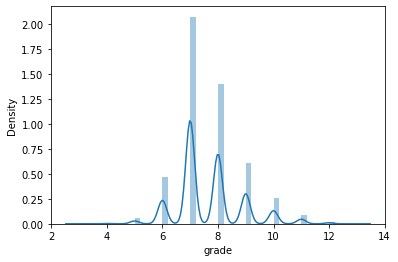

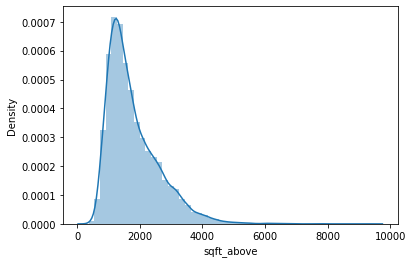

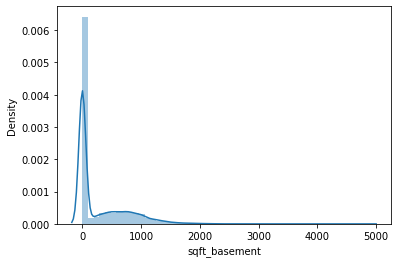

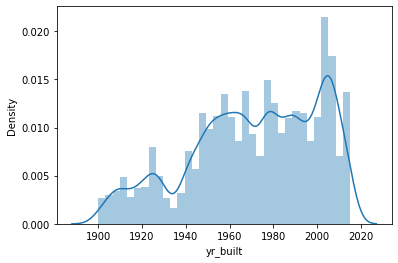

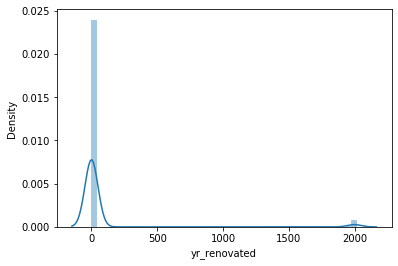

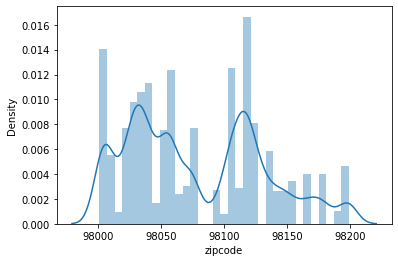

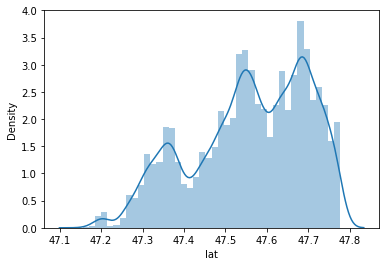

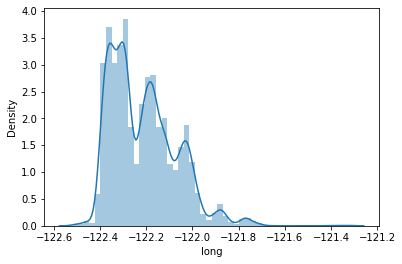

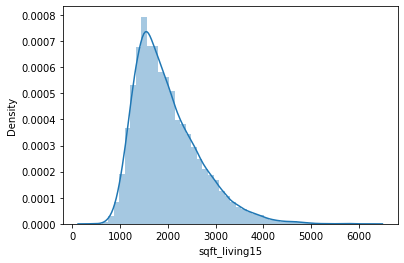

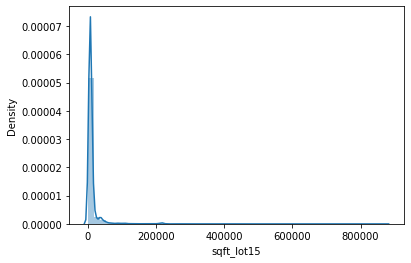

In [11]:
# Iterate through each column in  the dataframe and create a distplot from seaborn using sns.distplot

for cols in df.columns:
    plt.subplots(1, 1)
    sns.distplot(df[cols])

In [12]:
# After noticing some pretty heavy outliers I am going to trim down the values for each of the following columns:

df = df[df['price'] < 1000000]
df = df[df['bathrooms'] <= 5]
df = df[df['bedrooms'] <= 6]
df = df[df['sqft_living'] <= 6000]
df = df[df['sqft_above'] <= 5000 ]
df = df[df['sqft_basement'] < 1000]
df = df[df['sqft_lot'] <= 15000]
df = df[df['sqft_living15'] <= 5000]
df = df[df['sqft_lot15'] <= 10000]
df = df[df['floors'] <= 3]




In [13]:
# The bathrooms and floors column have weird data inputs such as 2.25/2.75 for number of bathrooms,
# and 2.5 floors. To make more sense of this data, I'm going to round the data to the nearest 0.

df['bathrooms'] = np.round(df['bathrooms'], 0)
df['floors'] = np.round(df['floors'], 0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14208 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             14208 non-null  int64  
 1   price          14208 non-null  float64
 2   bedrooms       14208 non-null  float64
 3   bathrooms      14208 non-null  float64
 4   sqft_living    14208 non-null  float64
 5   sqft_lot       14208 non-null  float64
 6   floors         14208 non-null  float64
 7   waterfront     14208 non-null  float64
 8   view           14208 non-null  float64
 9   condition      14208 non-null  float64
 10  grade          14208 non-null  float64
 11  sqft_above     14208 non-null  float64
 12  sqft_basement  14208 non-null  float64
 13  yr_built       14208 non-null  float64
 14  yr_renovated   14208 non-null  float64
 15  zipcode        14208 non-null  float64
 16  lat            14208 non-null  float64
 17  long           14208 non-null  float64
 18  sqft_l

Now at this point, given the heavy trims to the data column values, the dataset entries went from 21,597 to 14,208.
Which is a big chunk however, by doing this we keep a lot of true values without the heavy outliers that would potentially negatively alter our model. 

Also this allows us to focus on the more common and popular data values, which targets a middle class housing market by keeping our housing price target under 1 million dollars.

Now I'm going to take another look at our density plot and see how the distributions look for each column.

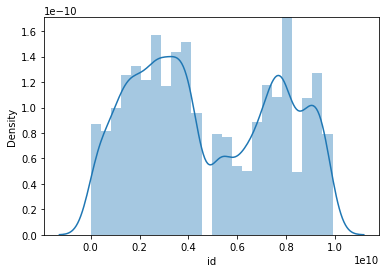

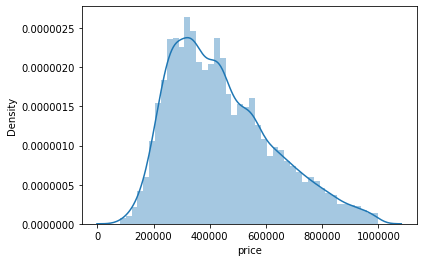

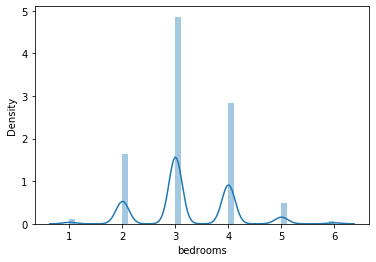

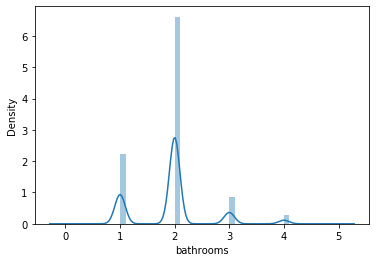

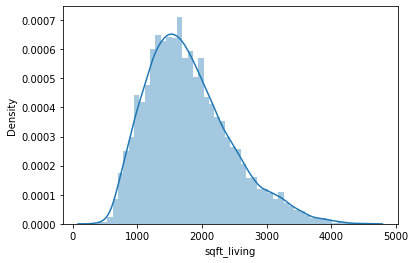

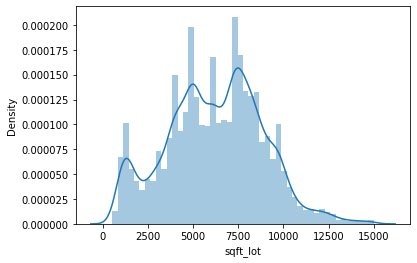

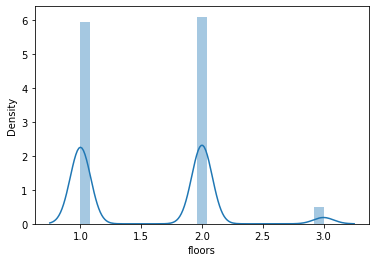

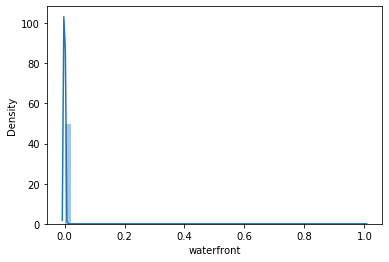

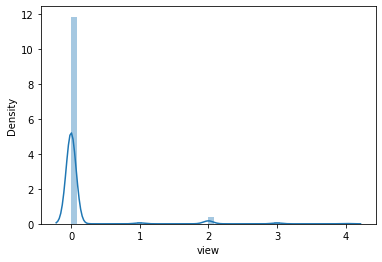

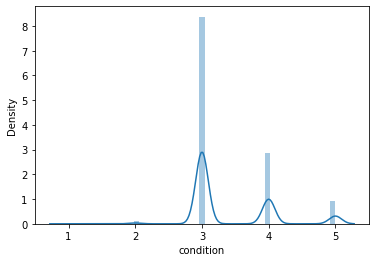

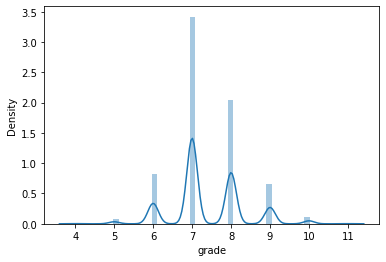

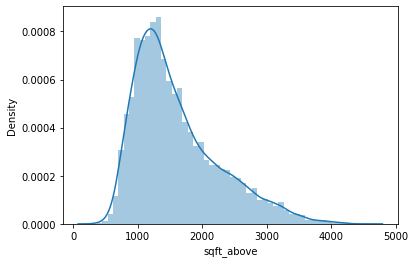

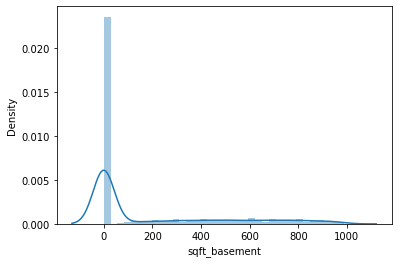

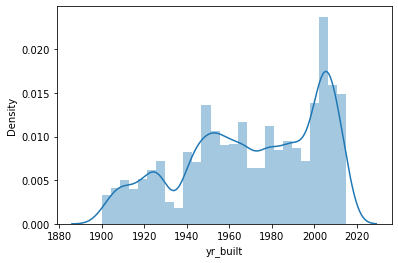

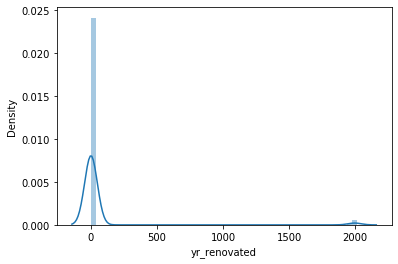

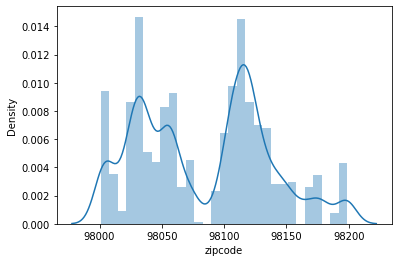

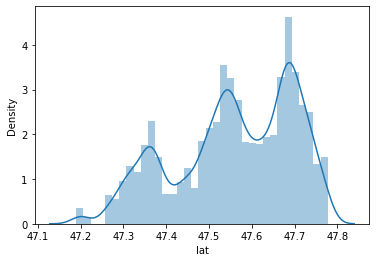

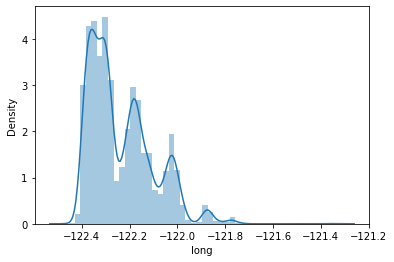

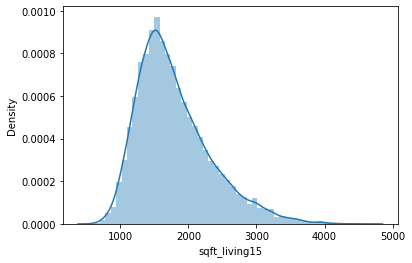

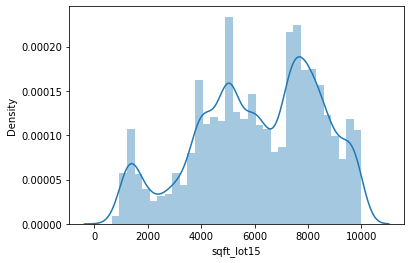

In [15]:
for cols in df.columns:
    plt.subplots(1, 1)
    sns.distplot(df[cols])

Much better! There's no more heavy tales for the continous data. There may be some plots that look like they have heavy tails, however they are most likely categorical. Which we will be dealing with later on.

# Preprocessing: Exploring Predictors and Their Correlation with Target Variable "price"

The next step in the preprocessing stage, I am going to analyze the data predictors and their correlation with the target variable 'price'. 

In [16]:
# These next few lines of code will create a dataframe of predictors and their correlation with the target variable 'price'
# This block of code will be used frequently through the preprocessing and final modeling
# assign the predictors to x and assign the target variable to y
x = df.drop(columns=['price'], axis=1)
y = df['price']

# create a list for the coefficient correlation to price
correlation_to_price = []
# iterate through each column in x and append the coefficient correlation value to the list
# stats.pearsonr(x,y) returns the coefficient correlation and p-value for each predictor, however we just want to collect
# the coefficient correlation using [0]
# round the coeifficient values to 2
for col in x.columns:
    correlation_to_price.append(round(stats.pearsonr(x[col],y)[0],2))

# next we need to assign the coefficient corr. values to a dictionary along with their corresponding column names
# create a dictionary
correlation_dict={}
# iterate and match each column with its coefficient correlation
for i, c in zip(x.columns,correlation_to_price):
    correlation_dict[i] = c

# finally create a dataframe for the predictors and correlation
df_correlation = pd.DataFrame(sorted(correlation_dict.items(),key=lambda x:x[1],reverse=True),columns=['predictors','correlation'])


In [17]:
df_correlation

,predictors,correlation
0,grade,0.57
1,sqft_living,0.54
2,lat,0.49
3,sqft_living15,0.47
4,sqft_above,0.46
5,bathrooms,0.37
6,floors,0.30
7,bedrooms,0.26
8,view,0.19
9,sqft_basement,0.18


Now that looks great! But lets make this more interesting and pleasant to look at by turning this dataframe into
a vizualization.

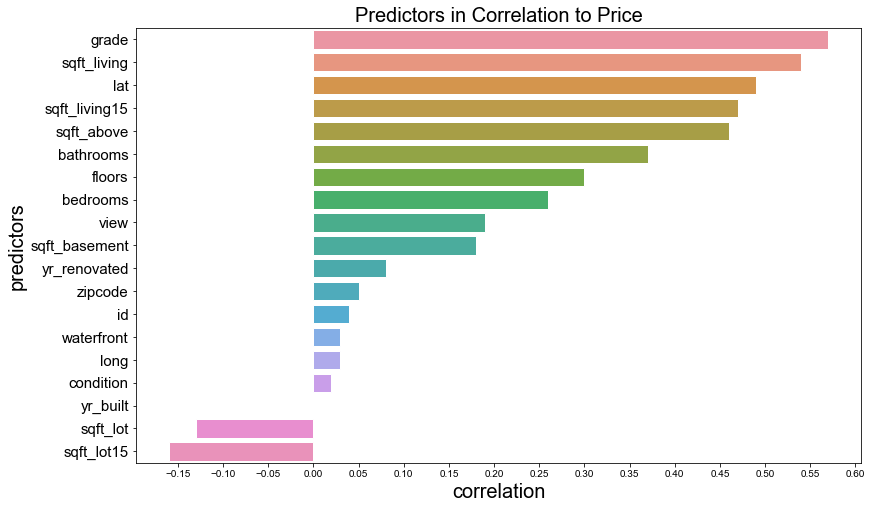

In [18]:
# Generate a simple barplot from seaborn using the df_correlation['correlation'] as x 
# and ['predictors'] as y

fig, ax = plt.subplots(figsize=(13,8))

plt.xticks(np.arange(-1,1,.05))
plt.yticks(size=15)

plt.title("Predictors in Correlation to Price", size=20)
plt.xlabel("Correlation", size=20)
plt.ylabel("Predictors", size =20)


sns.set_theme(font_scale=1)
sns.barplot(df_correlation['correlation'],df_correlation['predictors'])

Awesome! By looking at this we have an easier understanding of how each column correlates with the target variable 'price'. 

Off the bat there are some columns i want to drop to simplify our dataframe with the predictors I believe to be more important to our model.

I'm going to be dropping any column that has a negative correlation with price, as well as 'id' and 'zipcode'
'id' is simply just irrelevant to our dataset and 'zipcode' does not make sense to me when looking for a house.

In [19]:
df = df.drop(['id', 'zipcode', 'sqft_lot', 'sqft_lot15', 'yr_built'], axis = 1)

Great! Now we are going to run our first OLS Model and look at the results.

In [20]:
# set predictors to all columns besides our target variable 'price'
predictors = df.drop(['price'], axis =1)

In [21]:
# add constant term in place of intercept
predictors_int = sm.add_constant(predictors)

# use sm.OLS(target variable, predictors).fit()
model = sm.OLS(df['price'],predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     1871.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:11:13   Log-Likelihood:            -1.8495e+05
No. Observations:               14208   AIC:                         3.699e+05
Df Residuals:                   14193   BIC:                         3.700e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.977e+07   1.01e+06    -39.235      0.000   -4.18e+07   -3.78e+07
bedrooms      -8421.7483   1447.927     -5.816      0.000   -1.13e+04   -5583.621
bathrooms     -4625.6279   1921.733     -2.407      0.016   -8392.477    -858.779
sqft_living      85.0475     14.245      5.970      0.000      57.125     112.970
floors         1.848e+04   2063.160      8.958      0.000    1.44e+04    2.25e+04
waterfront     2.002e+05    5.5e+04      3.638      0.000    9.23e+04    3.08e+05
view           3.617e+04   1928.964     18.750      0.000    3.24e+04    3.99e+04
condition      3.894e+04   1518.383     25.646      0.000     3.6e+04    4.19e+04
grade          5.689e+04   1503.424     37.838      0.000    5.39e+04    5.98e+04
sqft_above        4.7015     14.259      0.330      0.742     -23.249      32.652
sqft_basement    25.9081     14.247      1.819      0.069      -2.018      53.834
yr_renovated     39.6389      2.844     13.938      0.000      34.064      45.214
lat              6.1e+05   6874.531     88.727      0.000    5.96e+05    6.23e+05
long          -8.519e+04   8275.328    -10.295      0.000   -1.01e+05    -6.9e+04
sqft_living15    40.9113      2.864     14.284      0.000      35.297      46.525
==============================================================================
Omnibus:                      971.227   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1525.423
Skew:                           0.550   Prob(JB):                         0.00
Kurtosis:                       4.168   Cond. No.                     3.51e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Next create a QQ Plot to display the residuals and see if they follow a normal distribution.

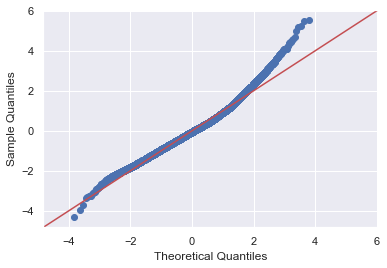

In [22]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

This isn't too bad, i don't believe our predictors and modeling will be perfect so this is manageable.
Let's take another look at our dataframe.

In [23]:
df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15
0,221900.0,3.0,1.0,1180.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,0.0,47.5112,-122.257,1340.0
1,538000.0,3.0,2.0,2570.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1991.0,47.7210,-122.319,1690.0
2,180000.0,2.0,1.0,770.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,0.0,47.7379,-122.233,2720.0
3,604000.0,4.0,3.0,1960.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,0.0,47.5208,-122.393,1360.0
4,510000.0,3.0,2.0,1680.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,0.0,47.6168,-122.045,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3.0,2.0,1530.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,0.0,47.6993,-122.346,1530.0
21593,400000.0,4.0,2.0,2310.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,0.0,47.5107,-122.362,1830.0
21594,402101.0,2.0,1.0,1020.0,2.0,0.0,0.0,3.0,7.0,1020.0,0.0,0.0,47.5944,-122.299,1020.0
21595,400000.0,3.0,2.0,1600.0,2.0,0.0,0.0,3.0,8.0,1600.0,0.0,0.0,47.5345,-122.069,1410.0


The dataframe looks great! All of the columns still have their true values. So now for future reference, I am going to assign this dataframe to a csv file, to pull up later if needed.

In [24]:
# use .to_csv('creat_name') to create a csv file
df.to_csv('prepro_df.csv', index=False)

# Preprocessing: Dealing with Categorical Values

Now its time to take a look at categorical values and what to do with them.

To identify categoricals, i'll be using a hist plot and by doing so I should be able to easily see gaping values which would signify a category.

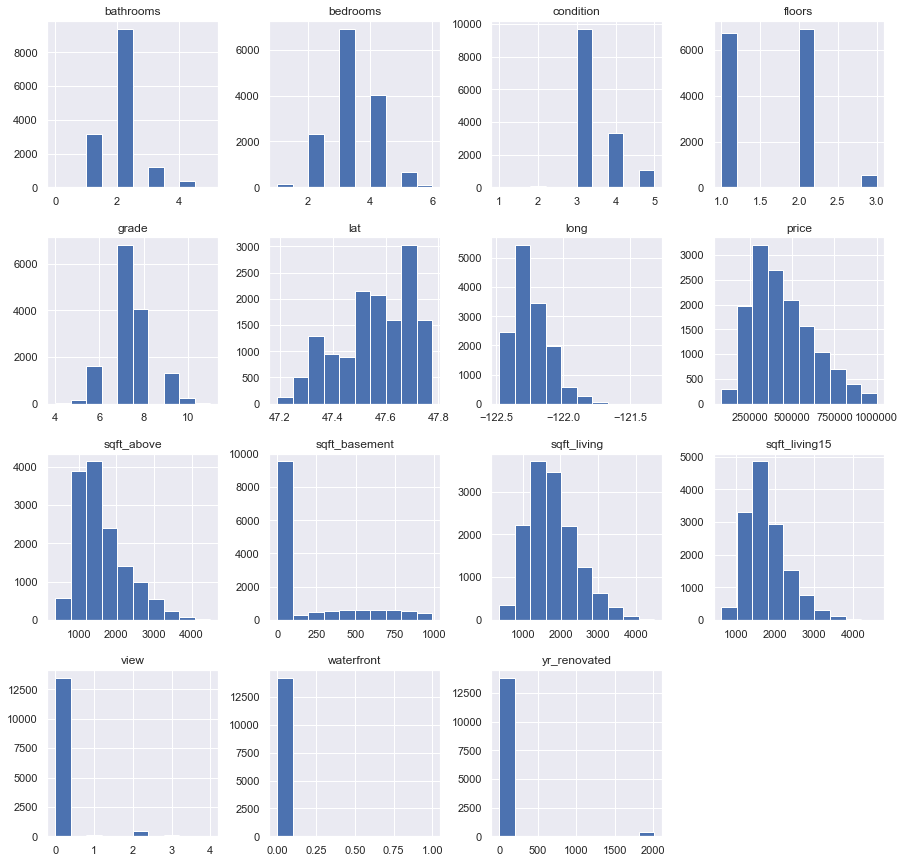

In [25]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.hist(ax = ax);

By looking at the histograms of each column, I'm able to notice that 'bedrooms', 'floors', 'grade','view','waterfront','bathrooms','condition', and 'yr_renovated' are all categorical values.

Another way of indicating that these are true categorical values is look at scatter plots for each of these columns as well.

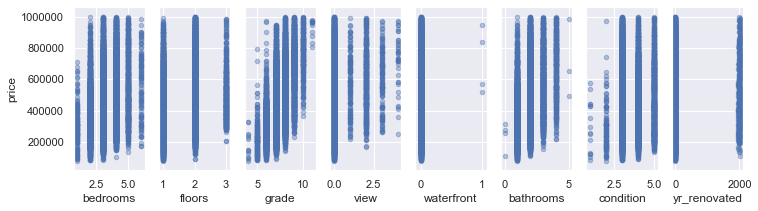

In [26]:
# To view these columns I'll create a for loop to iterate through each column and at same time creating a scatter plot
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(12,3), sharey=True)

for xcol, ax in zip([ 'bedrooms', 'floors', 'grade','view','waterfront','bathrooms','condition','yr_renovated'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

Each scatter plot above clearly shows that each of those columns are categorical by the way the data points follow a clean vertical line.

Now that I know what the categorical columns are, I'm now going to assign them to a variable called 'categoricals' so that I can focus and work on these specific columns.

In [27]:
# assign categorical columns to variable
categoricals = df[['bedrooms', 'bathrooms', 'floors', 'grade', 'view', 'condition', 'yr_renovated','waterfront']].copy()



In [28]:
categoricals

,bedrooms,bathrooms,floors,grade,view,condition,yr_renovated,waterfront
0,3.0,1.0,1.0,7.0,0.0,3.0,0.0,0.0
1,3.0,2.0,2.0,7.0,0.0,3.0,1991.0,0.0
2,2.0,1.0,1.0,6.0,0.0,3.0,0.0,0.0
3,4.0,3.0,1.0,7.0,0.0,5.0,0.0,0.0
4,3.0,2.0,1.0,8.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...
21592,3.0,2.0,3.0,8.0,0.0,3.0,0.0,0.0
21593,4.0,2.0,2.0,8.0,0.0,3.0,0.0,0.0
21594,2.0,1.0,2.0,7.0,0.0,3.0,0.0,0.0
21595,3.0,2.0,2.0,8.0,0.0,3.0,0.0,0.0


To get a deeper and better understanding of these categoricals, I'll once again iterate through each column using a for loop, and this time I'll be creating a boxplot from seaborn for each one.

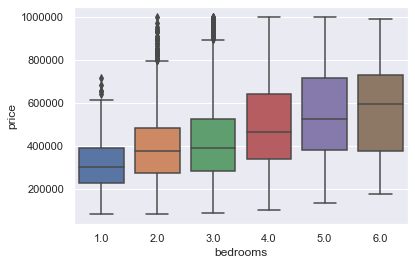

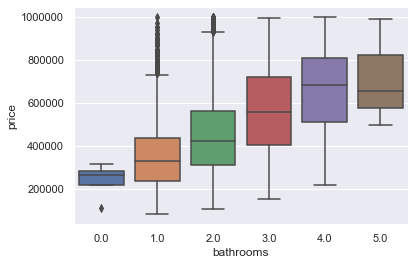

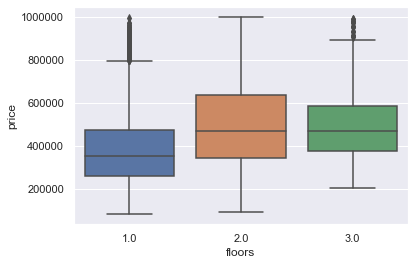

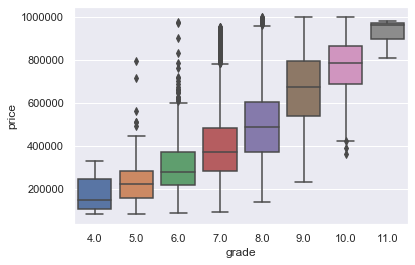

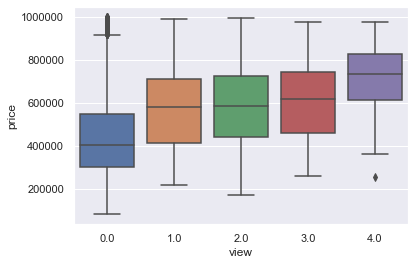

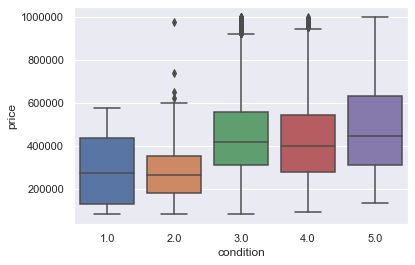

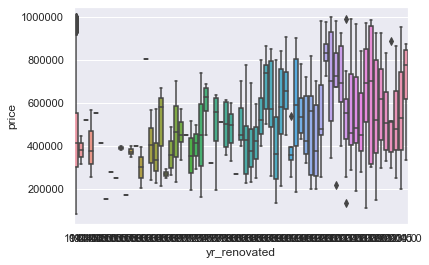

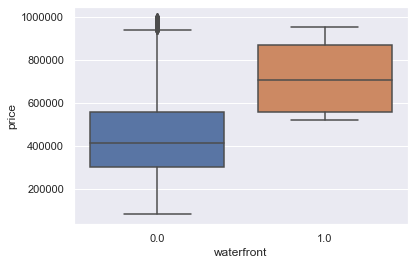

In [29]:
# use for loop to iterate through each column in the categoricals dataframe 
# create a boxplot for each one
for cols in categoricals.columns:
    plt.subplots(1, 1)
    sns.boxplot(x=categoricals[cols], y=df['price'])

After looking at the box plots, they all seem to fit a linear path which is good, except for yr_renovated.
So instead of creating dummies for yr_renovated, I will create a binary format for yr_renovated.
By doing this, the yr_renovated column will show 1 for if the home has been renovated, and 0 for if it has not.

Also, the view column displays how many times a house has been viewed. I want to simplify this column and change it to a binary format as well. That way it shows whether a house has been viewed or not, regardless of how many times.

In [30]:
df['renovated_binary'] = df['yr_renovated'].map(lambda x:0 if x == 0 else 1)


In [31]:
df['view_binary'] = df['view'].map(lambda x: 0 if x == 0 else 1)

Perfect, now I'm going to continue to create dummy variables for the other columns. At first I actually didn't want to because the box plots show me that the categorical columns follow a linear path against price. So withouth making things more complicated, I would've kept it as is.
However, I am making predictions for each column and for categorical values, I need to know how each value performs individually to predict pricing for each of those values.

For example, for bathrooms, It'll benefit my findings more if I can see how each number of bathrooms affects price instead of modeling bathrooms as a whole. This way I'm able to see if having 2 bathrooms would cost more than having 3.

In [32]:
# use pd.get_dummies while adding drop_first=True as an argument to avoid the dummy trap
bdrm = pd.get_dummies(df['bedrooms'], prefix='bdrms', drop_first=True)
bathrooms = pd.get_dummies(df['bathrooms'], prefix='bathrooms', drop_first=True)
floors = pd.get_dummies(df['floors'], prefix='floor', drop_first=True)
condition = pd.get_dummies(df['condition'],prefix='condition', drop_first=True)
waterfront = pd.get_dummies(df['waterfront'], prefix='waterfront', drop_first=True)
grade = pd.get_dummies(df['grade'], prefix='grade', drop_first=True)

In [33]:
# now to drop the categorical columns and replace with dummy variable columns
df = df.drop(['bedrooms','floors','waterfront','condition','yr_renovated', 'view','bathrooms','grade'],axis=1)

In [34]:
# taking a quick look at the dataframe just to check our progress and making sure things are okay
df

,price,sqft_living,sqft_above,sqft_basement,lat,long,sqft_living15,renovated_binary,view_binary
0,221900.0,1180.0,1180.0,0.0,47.5112,-122.257,1340.0,0,0
1,538000.0,2570.0,2170.0,400.0,47.7210,-122.319,1690.0,1,0
2,180000.0,770.0,770.0,0.0,47.7379,-122.233,2720.0,0,0
3,604000.0,1960.0,1050.0,910.0,47.5208,-122.393,1360.0,0,0
4,510000.0,1680.0,1680.0,0.0,47.6168,-122.045,1800.0,0,0
...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530.0,1530.0,0.0,47.6993,-122.346,1530.0,0,0
21593,400000.0,2310.0,2310.0,0.0,47.5107,-122.362,1830.0,0,0
21594,402101.0,1020.0,1020.0,0.0,47.5944,-122.299,1020.0,0,0
21595,400000.0,1600.0,1600.0,0.0,47.5345,-122.069,1410.0,0,0


Showing above is our current dataframe with the dropped categorical values and also we can see that the renovated and view column is now in a binary format!

In [35]:
# add dummy variable columns in place of previous dropped categorical columns
df = pd.concat([df, bdrm, floors, waterfront, condition,bathrooms, grade], axis=1)

In [36]:
# view the updated df
df

,price,sqft_living,sqft_above,sqft_basement,lat,long,sqft_living15,renovated_binary,view_binary,bdrms_2.0,...,bathrooms_3.0,bathrooms_4.0,bathrooms_5.0,grade_5.0,grade_6.0,grade_7.0,grade_8.0,grade_9.0,grade_10.0,grade_11.0
0,221900.0,1180.0,1180.0,0.0,47.5112,-122.257,1340.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,538000.0,2570.0,2170.0,400.0,47.7210,-122.319,1690.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,180000.0,770.0,770.0,0.0,47.7379,-122.233,2720.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,604000.0,1960.0,1050.0,910.0,47.5208,-122.393,1360.0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,510000.0,1680.0,1680.0,0.0,47.6168,-122.045,1800.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530.0,1530.0,0.0,47.6993,-122.346,1530.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21593,400000.0,2310.0,2310.0,0.0,47.5107,-122.362,1830.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21594,402101.0,1020.0,1020.0,0.0,47.5944,-122.299,1020.0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
21595,400000.0,1600.0,1600.0,0.0,47.5345,-122.069,1410.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Now before we finish the dealing with categorical section, I'm going to run another OLS model to see where we're at now!

In [37]:
predictors = df.drop(['price'], axis =1)

In [38]:

predictors_int = sm.add_constant(predictors)
model2 = sm.OLS(df['price'],predictors_int).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     847.1
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:11:29   Log-Likelihood:            -1.8479e+05
No. Observations:               14208   AIC:                         3.696e+05
Df Residuals:                   14175   BIC:                         3.699e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.849e+07   1.03e+06    -37.333      0.000   -4.05e+07   -3.65e+07
sqft_living         83.4924     14.110      5.917      0.000      55.834     111.151
sqft_above          -4.8091     14.144     -0.340      0.734     -32.533      22.915
sqft_basement       28.4590     14.118      2.016      0.044       0.786      56.131
lat               6.082e+05   6894.558     88.213      0.000    5.95e+05    6.22e+05
long             -7.802e+04   8318.587     -9.379      0.000   -9.43e+04   -6.17e+04
sqft_living15       37.1822      2.859     13.005      0.000      31.578      42.786
renovated_binary   7.66e+04   5624.755     13.619      0.000    6.56e+04    8.76e+04
view_binary       8.038e+04   4246.200     18.930      0.000    7.21e+04    8.87e+04
bdrms_2.0         1.089e+04   9219.927      1.181      0.237   -7180.180     2.9e+04
bdrms_3.0        -2389.0001   9258.897     -0.258      0.796   -2.05e+04    1.58e+04
bdrms_4.0        -8598.7178   9543.055     -0.901      0.368   -2.73e+04    1.01e+04
bdrms_5.0        -1.094e+04   1.04e+04     -1.048      0.294   -3.14e+04    9511.536
bdrms_6.0         -530.5297   1.44e+04     -0.037      0.971   -2.88e+04    2.78e+04
floor_2.0         3.305e+04   2428.809     13.606      0.000    2.83e+04    3.78e+04
floor_3.0         1.422e+04   5447.557      2.610      0.009    3538.406    2.49e+04
waterfront_1.0    2.706e+05   5.41e+04      4.998      0.000    1.64e+05    3.77e+05
condition_2.0      2.83e+04    2.9e+04      0.977      0.329   -2.85e+04    8.51e+04
condition_3.0     3.574e+04   2.72e+04      1.314      0.189   -1.76e+04     8.9e+04
condition_4.0     7.767e+04   2.72e+04      2.853      0.004    2.43e+04    1.31e+05
condition_5.0     1.163e+05   2.74e+04      4.249      0.000    6.26e+04     1.7e+05
bathrooms_1.0     9.364e+04    5.4e+04      1.734      0.083   -1.22e+04       2e+05
bathrooms_2.0     7.978e+04    5.4e+04      1.477      0.140   -2.61e+04    1.86e+05
bathrooms_3.0     8.762e+04   5.41e+04      1.618      0.106   -1.85e+04    1.94e+05
bathrooms_4.0     9.072e+04   5.44e+04      1.669      0.095   -1.58e+04    1.97e+05
bathrooms_5.0     1.434e+05   8.28e+04      1.732      0.083   -1.89e+04    3.06e+05
grade_5.0         7609.2024   3.03e+04      0.251      0.802   -5.17e+04     6.7e+04
grade_6.0         2.851e+04   2.93e+04      0.972      0.331    -2.9e+04     8.6e+04
grade_7.0         7.499e+04   2.94e+04      2.554      0.011    1.74e+04    1.33e+05
grade_8.0         1.346e+05   2.95e+04      4.568      0.000    7.69e+04    1.92e+05
grade_9.0         2.201e+05   2.97e+04      7.404      0.000    1.62e+05    2.78e+05
grade_10.0         2.85e+05   3.05e+04      9.339      0.000    2.25e+05    3.45e+05
grade_11.0        3.993e+05   4.32e+04      9.247      0.000    3.15e+05    4.84e+05
=======================

Not bad, The R^2 value was 0.649 before and now it is 0.657! We took care of the categorical values and bumped up the R^2 value in the process.

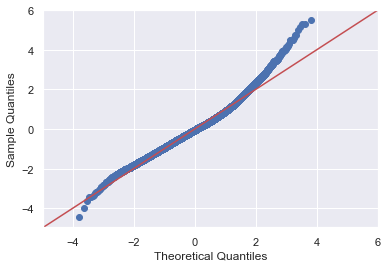

In [39]:
residuals2 = model2.resid
fig = sm.graphics.qqplot(residuals2, dist=stats.norm, line='45', fit=True)
fig.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14208 entries, 0 to 21596
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             14208 non-null  float64
 1   sqft_living       14208 non-null  float64
 2   sqft_above        14208 non-null  float64
 3   sqft_basement     14208 non-null  float64
 4   lat               14208 non-null  float64
 5   long              14208 non-null  float64
 6   sqft_living15     14208 non-null  float64
 7   renovated_binary  14208 non-null  int64  
 8   view_binary       14208 non-null  int64  
 9   bdrms_2.0         14208 non-null  uint8  
 10  bdrms_3.0         14208 non-null  uint8  
 11  bdrms_4.0         14208 non-null  uint8  
 12  bdrms_5.0         14208 non-null  uint8  
 13  bdrms_6.0         14208 non-null  uint8  
 14  floor_2.0         14208 non-null  uint8  
 15  floor_3.0         14208 non-null  uint8  
 16  waterfront_1.0    14208 non-null  uint8 

# Preprocessing: Normalizing Non-Categorical Values and Dealing with Multicollinearity

The next step in the preprocessing stage, is to focus on the non-categorical columns and make sure they follow a normal distribution as well as deal with any multicollinearity.

In [41]:
# To focus on just the non-categorical values, assign the non-cat values to a variable
non_categorical = df[['sqft_living','sqft_above','sqft_basement', 'lat', 'long', 'sqft_living15']]




In [42]:
non_categorical

,sqft_living,sqft_above,sqft_basement,lat,long,sqft_living15
0,1180.0,1180.0,0.0,47.5112,-122.257,1340.0
1,2570.0,2170.0,400.0,47.7210,-122.319,1690.0
2,770.0,770.0,0.0,47.7379,-122.233,2720.0
3,1960.0,1050.0,910.0,47.5208,-122.393,1360.0
4,1680.0,1680.0,0.0,47.6168,-122.045,1800.0
...,...,...,...,...,...,...
21592,1530.0,1530.0,0.0,47.6993,-122.346,1530.0
21593,2310.0,2310.0,0.0,47.5107,-122.362,1830.0
21594,1020.0,1020.0,0.0,47.5944,-122.299,1020.0
21595,1600.0,1600.0,0.0,47.5345,-122.069,1410.0


So first, I'm going to look at each column's hist plot like I did earlier with the categorical values.

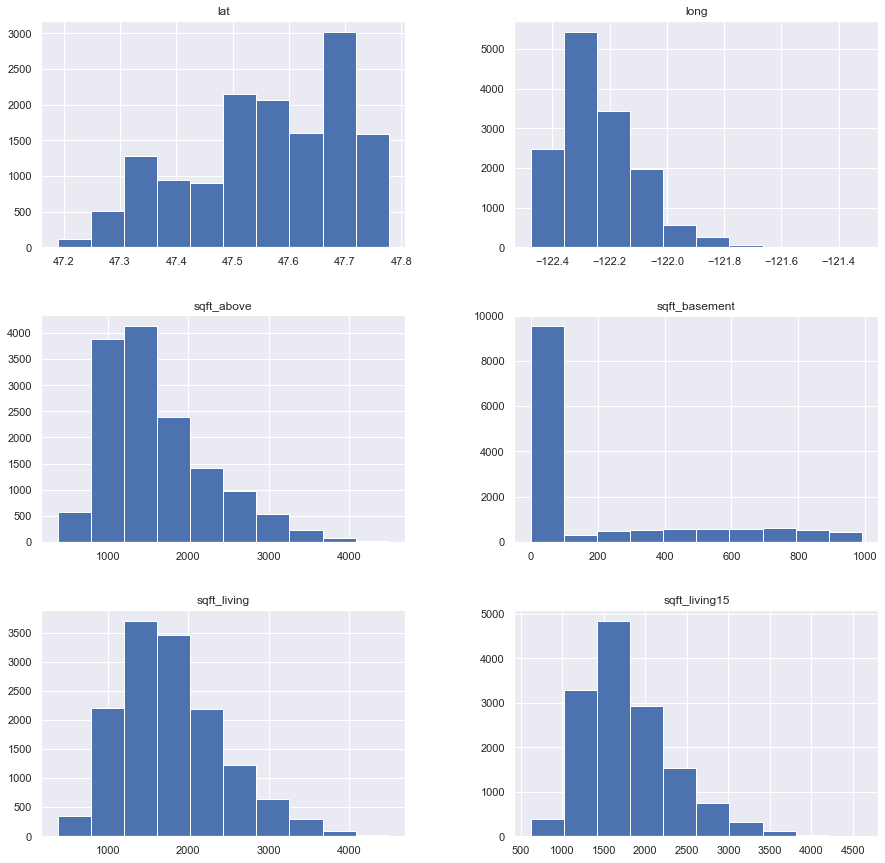

In [43]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
non_categorical.hist(ax = ax);

After looking at each non-categorical predictor, they follow a pretty normal distribution except for sqft_basement.
Now I could use normalization techniques such as min-max scaling and standardization, however, I want to keep the data values as true as possible without over complicating things. So I won't be using those techniques if not necessary. 

The sqft_basement predictor is out of wack so I will be converting that column to a binary format.

In [44]:
# create binary format for sqft_basement and assign to new column
df['sqft_basement_binary'] = df['sqft_basement'].map(lambda x:0 if x == 0 else 1)

In [45]:
# drop the sqft_basement
df = df.drop(['sqft_basement'], axis=1)

The next step will be to deal with multicollinearity, and to do that I first need do discover which columns are highly correlated with eachother

In [46]:
# To do this easily, use .corr()
non_categorical.corr()

,sqft_living,sqft_above,sqft_basement,lat,long,sqft_living15
sqft_living,1.000000,0.896236,0.199700,-0.044440,0.343795,0.752979
sqft_above,0.896236,1.000000,-0.244808,-0.100384,0.440867,0.746121
sqft_basement,0.199700,-0.244808,1.000000,0.121839,-0.217463,-0.000479
lat,-0.044440,-0.100384,0.121839,1.000000,-0.209937,-0.045847
long,0.343795,0.440867,-0.217463,-0.209937,1.000000,0.427435
sqft_living15,0.752979,0.746121,-0.000479,-0.045847,0.427435,1.000000


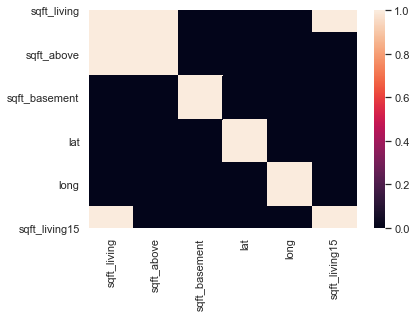

In [47]:
# Also use a vizualization to view the correlation
sns.heatmap(abs(non_categorical.corr()) > 0.75)

In [48]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df_corr=non_categorical.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

# set index to pairs
df_corr.set_index(['pairs'], inplace = True)

#d rop level columns
df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_corr.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_corr.drop_duplicates(inplace=True)

In [49]:
# now to view any correlated columns between 75% and 100% as these numbers represent a high correlation
df_corr[(df_corr.cc>.75) & (df_corr.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.896236
"(sqft_living15, sqft_living)",0.752979


In [50]:
# before dropping any columns, I need to have a better look at which columns are more important to my model
df[['sqft_living','sqft_above', 'sqft_living15', 'price']].corr()

,sqft_living,sqft_above,sqft_living15,price
sqft_living,1.000000,0.896236,0.752979,0.543906
sqft_above,0.896236,1.000000,0.746121,0.456098
sqft_living15,0.752979,0.746121,1.000000,0.466388
price,0.543906,0.456098,0.466388,1.000000


In [51]:
# sqft_living shows more value in correlation to price. 
# Therefore I will be dropping the other heavy correlated columns 
df = df.drop(['sqft_above', 'sqft_living15'], axis=1)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14208 entries, 0 to 21596
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 14208 non-null  float64
 1   sqft_living           14208 non-null  float64
 2   lat                   14208 non-null  float64
 3   long                  14208 non-null  float64
 4   renovated_binary      14208 non-null  int64  
 5   view_binary           14208 non-null  int64  
 6   bdrms_2.0             14208 non-null  uint8  
 7   bdrms_3.0             14208 non-null  uint8  
 8   bdrms_4.0             14208 non-null  uint8  
 9   bdrms_5.0             14208 non-null  uint8  
 10  bdrms_6.0             14208 non-null  uint8  
 11  floor_2.0             14208 non-null  uint8  
 12  floor_3.0             14208 non-null  uint8  
 13  waterfront_1.0        14208 non-null  uint8  
 14  condition_2.0         14208 non-null  uint8  
 15  condition_3.0      

Nice! So now that the dataset has been cleaned and processed. It's time to view an OLS Model one last time to see where it stands.

In [53]:
predictors2 = df.drop(['price'], axis =1)

In [54]:
predictors_int = sm.add_constant(predictors2)
model4 = sm.OLS(df['price'],predictors_int).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     892.9
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:11:32   Log-Likelihood:            -1.8484e+05
No. Observations:               14208   AIC:                         3.697e+05
Df Residuals:                   14177   BIC:                         3.700e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -3.464e+07   1.01e+06    -34.153      0.000   -3.66e+07   -3.27e+07
sqft_living             99.4197      2.627     37.849      0.000      94.271     104.568
lat                    6.09e+05   6912.231     88.112      0.000    5.96e+05    6.23e+05
long                 -4.664e+04   8166.370     -5.711      0.000   -6.26e+04   -3.06e+04
renovated_binary      7.129e+04   5624.664     12.675      0.000    6.03e+04    8.23e+04
view_binary           8.677e+04   4222.744     20.547      0.000    7.85e+04     9.5e+04
bdrms_2.0             4238.6289   9247.161      0.458      0.647   -1.39e+04    2.24e+04
bdrms_3.0            -9761.0866   9283.310     -1.051      0.293    -2.8e+04    8435.421
bdrms_4.0            -1.453e+04   9570.143     -1.519      0.129   -3.33e+04    4226.273
bdrms_5.0            -1.758e+04   1.05e+04     -1.681      0.093   -3.81e+04    2923.731
bdrms_6.0            -1.568e+04   1.45e+04     -1.085      0.278    -4.4e+04    1.26e+04
floor_2.0             3.046e+04   2329.708     13.074      0.000    2.59e+04     3.5e+04
floor_3.0             7559.4957   5397.354      1.401      0.161   -3020.028    1.81e+04
waterfront_1.0        2.702e+05   5.43e+04      4.972      0.000    1.64e+05    3.77e+05
condition_2.0         1.372e+04   2.91e+04      0.472      0.637   -4.33e+04    7.07e+04
condition_3.0         2.169e+04   2.73e+04      0.795      0.426   -3.18e+04    7.52e+04
condition_4.0           6.3e+04   2.73e+04      2.307      0.021    9465.928    1.17e+05
condition_5.0          1.01e+05   2.74e+04      3.681      0.000    4.72e+04    1.55e+05
bathrooms_1.0         9.357e+04   5.42e+04      1.726      0.084   -1.27e+04       2e+05
bathrooms_2.0          7.73e+04   5.42e+04      1.425      0.154    -2.9e+04    1.84e+05
bathrooms_3.0          8.31e+04   5.43e+04      1.529      0.126   -2.34e+04     1.9e+05
bathrooms_4.0         8.269e+04   5.46e+04      1.515      0.130   -2.43e+04     1.9e+05
bathrooms_5.0         1.229e+05   8.31e+04      1.478      0.139   -4.01e+04    2.86e+05
grade_5.0             2650.4861   3.04e+04      0.087      0.931   -5.69e+04    6.22e+04
grade_6.0             2.361e+04   2.94e+04      0.802      0.423   -3.41e+04    8.13e+04
grade_7.0             7.252e+04   2.95e+04      2.461      0.014    1.48e+04     1.3e+05
grade_8.0             1.365e+05   2.96e+04      4.613      0.000    7.85e+04    1.94e+05
grade_9.0             2.287e+05   2.98e+04      7.671      0.000     1.7e+05    2.87e+05
grade_10.0            2.967e+05   3.06e+04      9.697      0.000    2.37e+05    3.57e+05
grade_11.0            4.183e+05   4.33e+04      9.665      0.000    3.33e+05    5.03e+05
sqft_basement_binary   2.26e+04   2257.584     10.011      0.000    1.82e+04     2.7e+04
=========================================================

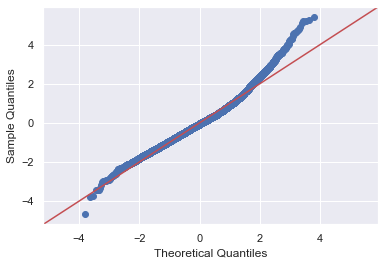

In [55]:
residuals4 = model4.resid
fig = sm.graphics.qqplot(residuals4, dist=stats.norm, line='45', fit=True)
fig.show()

The R^2 value dropped less than a percent (.003) from our previous R^2, which isn't bad considering the changes we've made since then. So still pretty content with those results.

Finally to end our preprocess stage, I will convert the final dataframe to a csv file to use in the next python notebook!

In [56]:
df.to_csv('final_model_df.csv', index=False)